## Crime Types Compared to UBC’s Surrounding Neighborhoods Throughout the Seasons


### Introduction

People researched crime opportunities for years, and there are already many theories in use, such as social disorganization (SD) theory, temperature aggression theory, etc. (Afon & Badiora, 2018). We plan to base this project on discovering how crime rates surrounding UBC’s campus relate to districts and seasons; our research has shown that spatial-temporal crime patterns are important to understand how the crime rate changes (Haberman, etc. al, 2018). To do this we will ask- is there a significant relationship between the most commonly committed types of crime in the neighbourhoods surrounding UBC and the season of the year the crimes are committed?

The database we plan to use in order to answer our question is published by the Vancouver Police Department. It contains information from the past 20 years about all reported crimes and relevant information about each crime. For our analysis, we will be using data from the year 2020 and selected five neighbourhoods near UBC’s campus. We will use the data for the type of crime and the month each crime occurred to analyze our question. From the response variable, the number of specific crimes, we will use the mean as the location parameter and variance as our scale parameter to assist us in finding the answer to our question. We have chosen these methods to compare the variance in crime per season to the mean in order to construct hypotheses and determine whether we fail to reject the null hypothesis or support the alternative hypothesis.



### Preliminary Results:

**Data to use:**

1. Year 2020
2. Neighbourhoods- 5 closest to UBC

  - Arbutus Ridge
  - Fairview
  - Kerrisdale
  - Kitsilano
  - West Point Grey
3. Type of Crime
4. Season


In [219]:
library(tidyverse)
library(rvest)
library(stringr)
library(repr)
library(tidymodels)
library(infer)
library(dplyr)

In [220]:
# Reading Data
id <- "1InFZlQaj3VzFHzhh5j8WJyDf4HmcD__-" # google file ID
vpd_crime_data <- read.csv(sprintf("https://docs.google.com/uc?id=%s&export=download", id))
vpd_crime_data <- na.omit(vpd_crime_data)
head(vpd_crime_data)

,TYPE,YEAR,MONTH,DAY,HOUR,MINUTE,HUNDRED_BLOCK,NEIGHBOURHOOD,X,Y
,<chr>,<int>,<int>,<int>,<int>,<int>,<chr>,<chr>,<dbl>,<dbl>
1,Theft of Vehicle,2020,4,19,21,30,29XX SLOCAN ST,Renfrew-Collingwood,496397.5,5456123
2,Theft of Vehicle,2020,2,21,1,43,29XX VENABLES ST,Hastings-Sunrise,496801.2,5458182
3,Theft of Vehicle,2020,2,11,1,30,29XX VIRTUAL WAY,Renfrew-Collingwood,497011.9,5456474
4,Theft of Vehicle,2020,5,16,22,0,29XX W 10TH AVE,Kitsilano,487613.2,5456729
5,Theft of Vehicle,2020,1,1,12,0,29XX WOODLAND DR,Kensington-Cedar Cottage,494641.9,5456214
6,Theft of Vehicle,2020,11,22,0,37,2X E CORDOVA ST,Central Business District,492453.1,5458847


In [221]:
str(vpd_crime_data)

'data.frame':	37491 obs. of  10 variables:
 $ TYPE         : chr  "Theft of Vehicle" "Theft of Vehicle" "Theft of Vehicle" "Theft of Vehicle" ...
 $ YEAR         : int  2020 2020 2020 2020 2020 2020 2020 2020 2020 2020 ...
 $ MONTH        : int  4 2 2 5 1 11 8 12 1 4 ...
 $ DAY          : int  19 21 11 16 1 22 17 24 1 8 ...
 $ HOUR         : int  21 1 1 22 12 0 21 23 0 21 ...
 $ MINUTE       : int  30 43 30 0 0 37 0 30 0 0 ...
 $ HUNDRED_BLOCK: chr  "29XX SLOCAN ST" "29XX VENABLES ST" "29XX VIRTUAL WAY" "29XX W 10TH AVE" ...
 $ NEIGHBOURHOOD: chr  "Renfrew-Collingwood" "Hastings-Sunrise" "Renfrew-Collingwood" "Kitsilano" ...
 $ X            : num  496397 496801 497012 487613 494642 ...
 $ Y            : num  5456123 5458182 5456474 5456729 5456214 ...
 - attr(*, "na.action")= 'omit' Named int 1081
  ..- attr(*, "names")= chr "1081"


In [222]:
summary(vpd_crime_data)

     TYPE                YEAR          MONTH             DAY       
 Length:37491       Min.   :2020   Min.   : 1.000   Min.   : 1.00  
 Class :character   1st Qu.:2020   1st Qu.: 3.000   1st Qu.: 8.00  
 Mode  :character   Median :2020   Median : 6.000   Median :15.00  
                    Mean   :2020   Mean   : 6.175   Mean   :15.16  
                    3rd Qu.:2020   3rd Qu.: 9.000   3rd Qu.:23.00  
                    Max.   :2020   Max.   :12.000   Max.   :31.00  
      HOUR           MINUTE      HUNDRED_BLOCK      NEIGHBOURHOOD     
 Min.   : 0.00   Min.   : 0.00   Length:37491       Length:37491      
 1st Qu.: 4.00   1st Qu.: 0.00   Class :character   Class :character  
 Median :13.00   Median : 8.00   Mode  :character   Mode  :character  
 Mean   :11.46   Mean   :16.48                                        
 3rd Qu.:18.00   3rd Qu.:30.00                                        
 Max.   :23.00   Max.   :59.00                                        
       X                Y  

In [223]:
# Tidying Data
neighbourhoods <- c("Arbutus Ridge", "Fairview", "Kerrisdale", "Kitsilano", "West Point Grey") # Near UBC neighbourhoods

vpd_crime_data <- vpd_crime_data %>% 
    select(TYPE, MONTH, DAY, HOUR, HUNDRED_BLOCK, NEIGHBOURHOOD) %>%
    filter(NEIGHBOURHOOD %in% neighbourhoods)

head(vpd_crime_data)

,TYPE,MONTH,DAY,HOUR,HUNDRED_BLOCK,NEIGHBOURHOOD
,<chr>,<int>,<int>,<int>,<chr>,<chr>
1,Theft of Vehicle,5,16,22,29XX W 10TH AVE,Kitsilano
2,Theft of Vehicle,2,22,22,30XX W 12TH AVE,Kitsilano
3,Theft of Vehicle,12,24,10,30XX W BROADWAY AV,Kitsilano
4,Theft of Vehicle,7,27,21,31XX CYPRESS ST,Kitsilano
5,Theft of Vehicle,1,16,16,31XX OAK ST,Fairview
6,Theft of Vehicle,3,21,18,31XX OAK ST,Fairview


In [224]:
# Number of crimes by months
crimes_by_months <- vpd_crime_data %>%
    group_by(MONTH) %>%
    summarize(count_crimes = n())
crimes_by_months

winter_months <- c(12, 1, 2)
spring_months <- c(3, 4, 5)
summer_months <- c(6, 7, 8)
fall_months <- c(9, 10, 11)

seasons <- c("Winter", "Spring", "Summer", "Fall")

# Counting the number of crimes for each season separately
crimes_for_winter <- crimes_by_months %>%
    filter(MONTH %in% winter_months) %>%
    summarize(count_crimes = sum(count_crimes))

crimes_for_spring <- crimes_by_months %>%
    filter(MONTH %in% spring_months) %>%
    summarize(count_crimes = sum(count_crimes))

crimes_for_summer <- crimes_by_months %>%
    filter(MONTH %in% summer_months) %>%
    summarize(count_crimes = sum(count_crimes))

crimes_for_fall <- crimes_by_months %>%
    filter(MONTH %in% fall_months) %>%
    summarize(count_crimes = sum(count_crimes))

# Binding all four data frames into one data frame to get the number of crimes in each season
crimes_by_season <- rbind(crimes_for_winter, crimes_for_spring, crimes_for_summer, crimes_for_fall) %>%
    cbind(seasons) 
# Renaming new column to seasons column
names(crimes_by_season)[names(crimes_by_season) == "count_crimes"] <- "num_of_crimes"
crimes_by_season

,MONTH,count_crimes
,<int>,<int>
1,1,468
2,2,453
3,3,520
4,4,473
5,5,360
6,6,372
7,7,452
8,8,468
9,9,486


num_of_crimes,seasons
<int>,<chr>
1241,Winter
1353,Spring
1292,Summer
1349,Fall


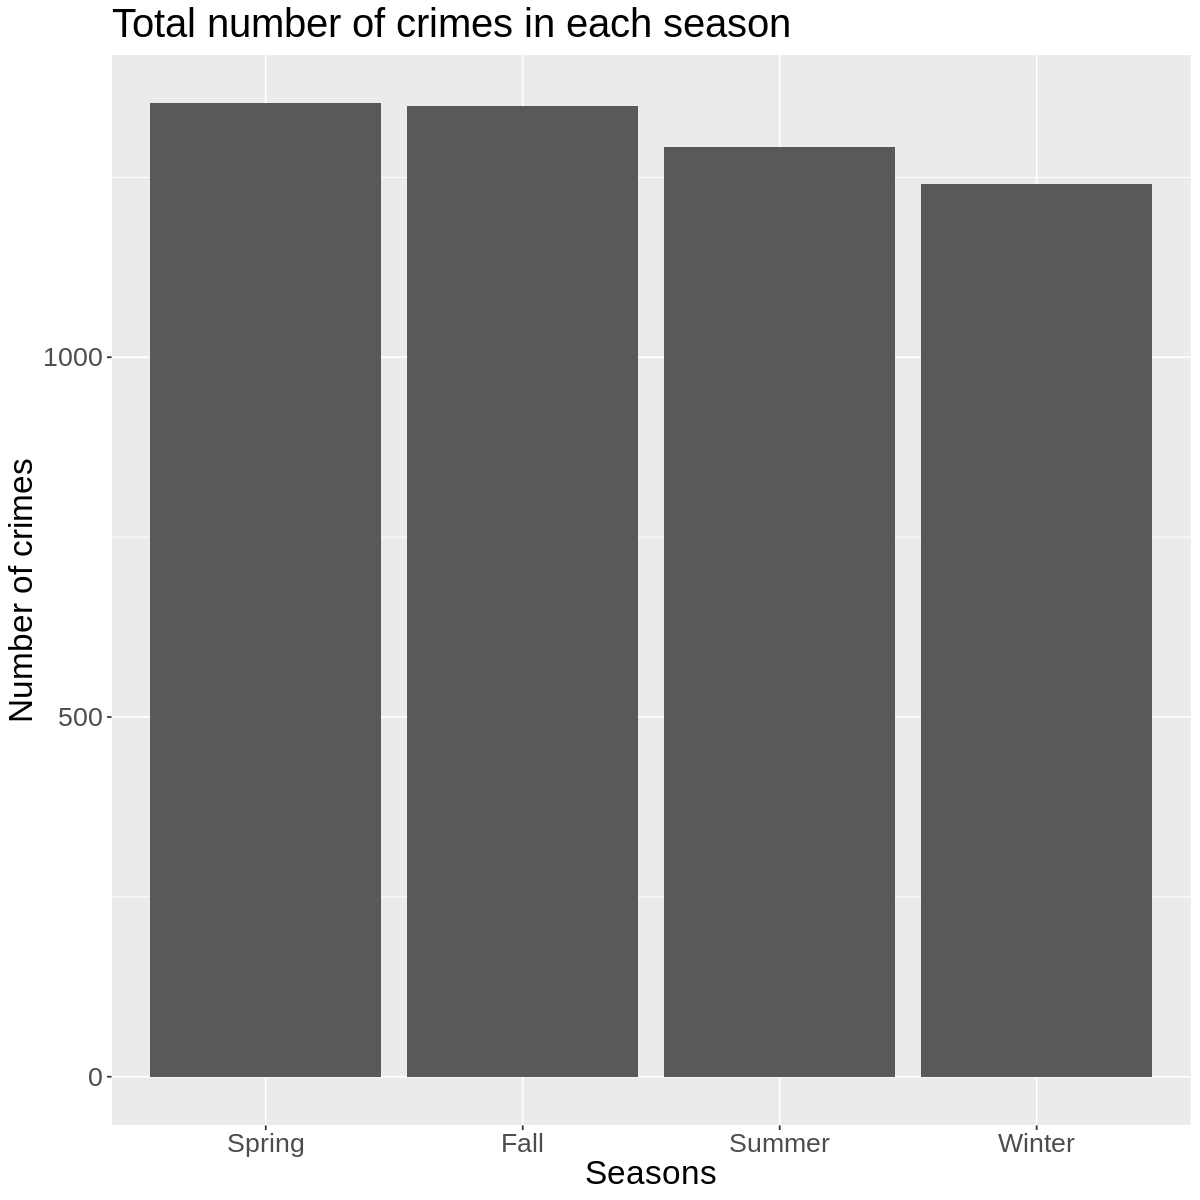

In [225]:
# Bar plot for total number of crimes in each season
options(repr.plot.width = 10, repr.plot.height = 10)

crimes_by_season_plot <- crimes_by_season %>%
    ggplot(aes(x = fct_reorder(seasons, num_of_crimes, .desc = TRUE),
               y = num_of_crimes)) +
    geom_bar(stat = "identity") +
    labs(x = "Seasons", y = "Number of crimes") +
    ggtitle("Total number of crimes in each season") +
    theme(text = element_text(size = 20))
crimes_by_season_plot

In [226]:
# Total number of crimes for each type (in total 11 types of crime)
count_types_of_crime <- vpd_crime_data %>%
    group_by(TYPE) %>%
    summarize(count_type = n())
count_types_of_crime

,TYPE,count_type
,<chr>,<int>
1,Break and Enter Commercial,485
2,Break and Enter Residential/Other,521
3,Homicide,1
4,Mischief,679
5,Offence Against a Person,206
6,Other Theft,937
7,Theft from Vehicle,1600
8,Theft of Bicycle,568
9,Theft of Vehicle,115


In [227]:
# Number of crimes by TYPE in each season
crimes_by_type <- vpd_crime_data %>%
    group_by(TYPE, MONTH) %>%
    summarize(count_crimes = n())

# Counting the number of crimes by type for each season separately
crimes_for_winter_types <- crimes_by_type %>%
    filter(MONTH %in% winter_months) %>%
    summarize(count_crimes = sum(count_crimes)) %>%
    mutate(newcol = "Winter")

crimes_for_spring_types <- crimes_by_type %>%
    filter(MONTH %in% spring_months) %>%
    summarize(count_crimes = sum(count_crimes)) %>%
    mutate(newcol = "Spring")

crimes_for_summer_types <- crimes_by_type %>%
    filter(MONTH %in% summer_months) %>%
    summarize(count_crimes = sum(count_crimes)) %>%
    mutate(newcol = "Summer")

crimes_for_fall_types <- crimes_by_type %>%
    filter(MONTH %in% fall_months) %>%
    summarize(count_crimes = sum(count_crimes)) %>%
    mutate(newcol = "Fall")

# Binding all four data frames into one data frame to get the number of crimes by type in each season 
crimes_by_type_and_season <- rbind(crimes_for_winter_types, crimes_for_spring_types, 
                                   crimes_for_summer_types, crimes_for_fall_types) 
# Renaming new column to seasons column
names(crimes_by_type_and_season)[names(crimes_by_type_and_season) == "newcol"] <- "Season"
crimes_by_type_and_season

`summarise()` has grouped output by 'TYPE'. You can override using the `.groups` argument.



TYPE,count_crimes,Season
<chr>,<int>,<chr>
Break and Enter Commercial,99,Winter
Break and Enter Residential/Other,121,Winter
Mischief,192,Winter
Offence Against a Person,44,Winter
Other Theft,257,Winter
Theft from Vehicle,423,Winter
Theft of Bicycle,48,Winter
Theft of Vehicle,28,Winter
Vehicle Collision or Pedestrian Struck (with Injury),29,Winter


In [228]:
summary(crimes_by_type_and_season)

     TYPE            count_crimes      Season         
 Length:39          Min.   :  1.0   Length:39         
 Class :character   1st Qu.: 34.0   Class :character  
 Mode  :character   Median :119.0   Mode  :character  
                    Mean   :134.2                     
                    3rd Qu.:187.0                     
                    Max.   :445.0                     

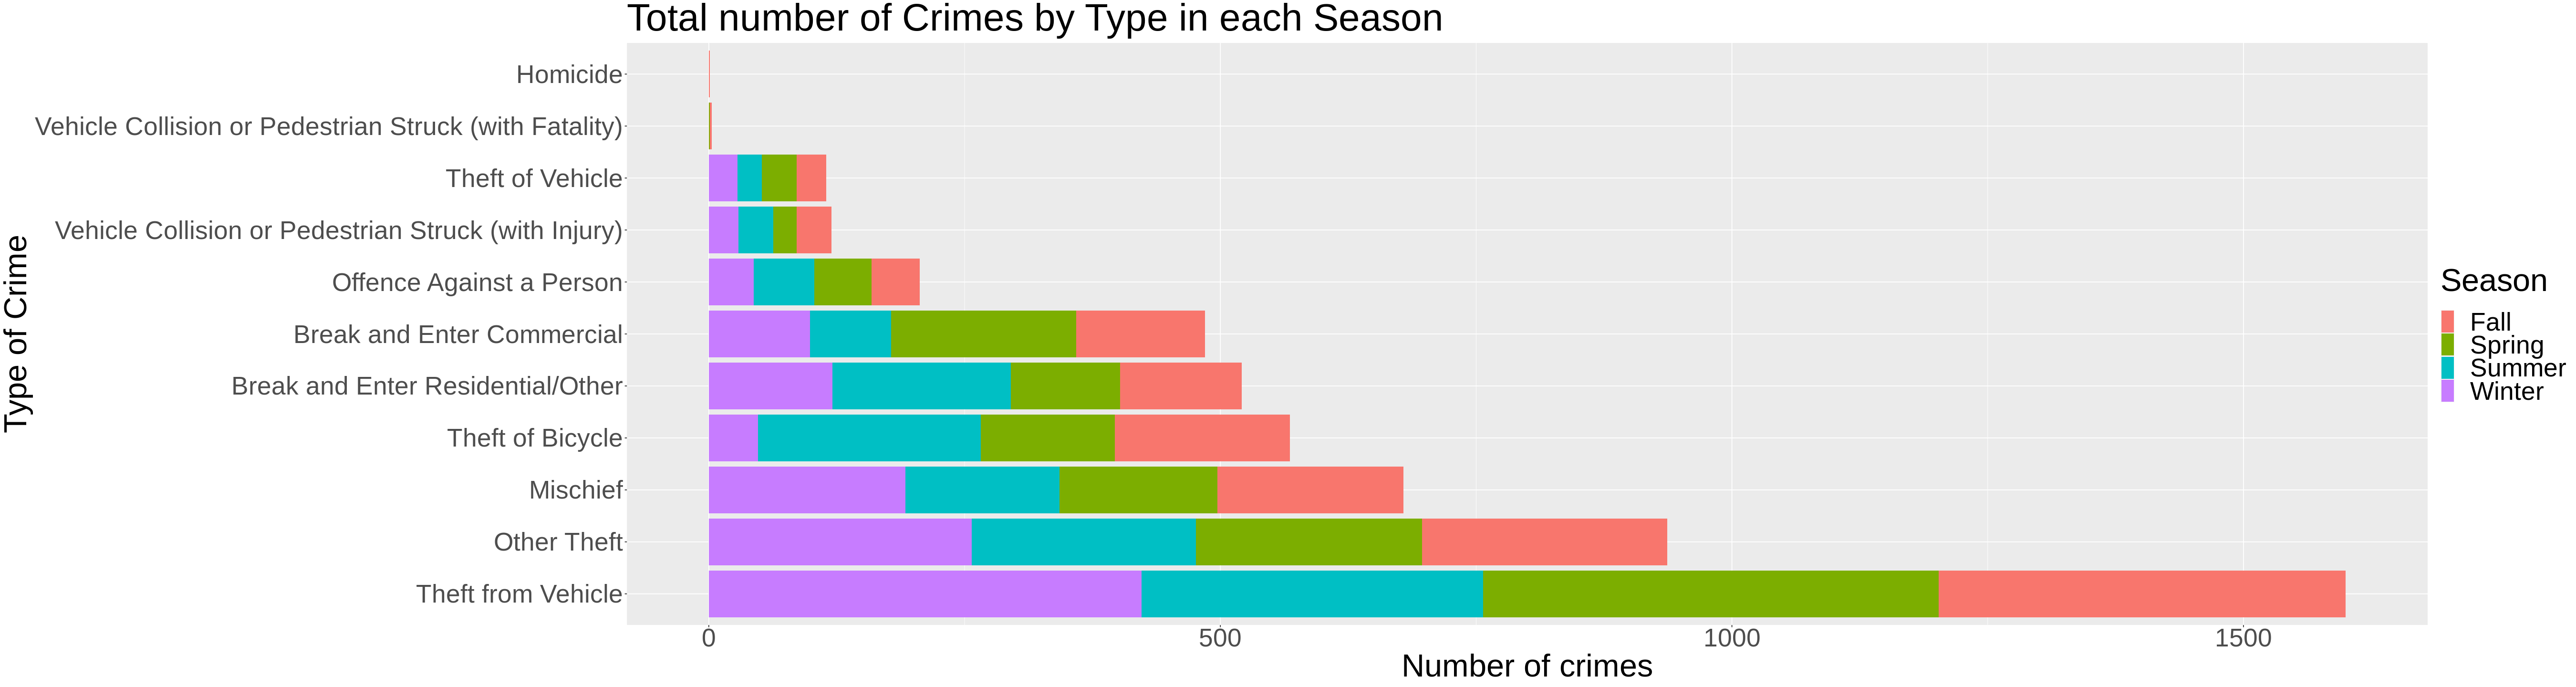

In [229]:
# Bar Plot for the number of crimes for each type of crime in each season 
options(repr.plot.width = 45, repr.plot.height = 12)

crimes_by_type_and_season_plot <- crimes_by_type_and_season %>%
    ggplot(aes(x = count_crimes,
               y = fct_reorder(TYPE, count_crimes, .desc = TRUE), 
               fill = Season)) +
    geom_bar(stat = "identity") +
    labs(x = "Number of crimes", y = "Type of Crime") +
    ggtitle("Total number of Crimes by Type in each Season") +
    theme(text = element_text(size = 40))

crimes_by_type_and_season_plot

From the plot above we can see that "Theft from Vehicle", "Other Theft", "Mischief" are top three types of crimes in all four seasons.

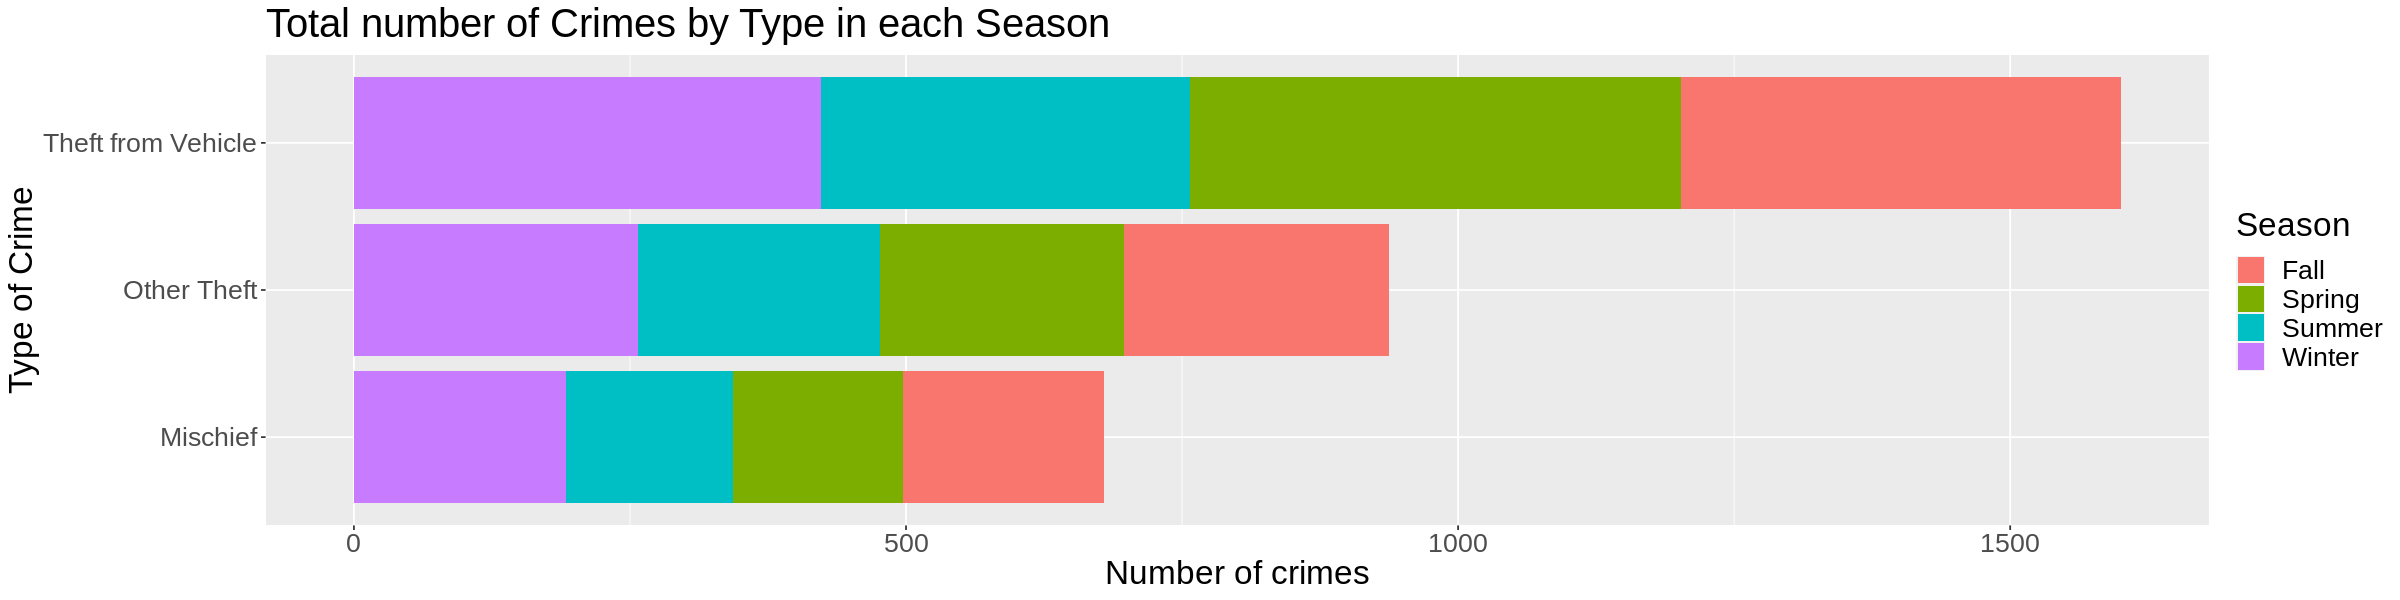

In [230]:
# Bar Plot for the number of crimes for top three types of crime in each season 
top3_types_of_crime <- c("Theft from Vehicle", "Other Theft", "Mischief")

crimes_by_type_and_season_top3 <- crimes_by_type_and_season %>%
    filter(TYPE %in% top3_types_of_crime)

 
options(repr.plot.width = 20, repr.plot.height = 5)

crimes_by_type_and_season_plot <- crimes_by_type_and_season_top3 %>%
    ggplot(aes(x = count_crimes,
               y = TYPE, 
               fill = Season)) +
    geom_bar(stat = "identity") +
    labs(x = "Number of crimes", y = "Type of Crime") +
    ggtitle("Total number of Crimes by Type in each Season") +
    theme(text = element_text(size = 20))

crimes_by_type_and_season_plot

### Methods: Plan

We are comparing the rates of different types of crimes in selected neighbourhoods in Vancouver for each season. In this report, we plotted the distribution of crimes per season to have a visual representation of this data, which showed us that at first glance there does appear to be a slight difference in the amount of crime per season. However, if we were to present this to a stakeholder, we would want to add a few things first. We are planning on constructing at least one hypothesis test that determines whether there is variance in crime per season. We would like to include a few confidence intervals to show the significance of our findings and how reliable our results are. Adding these things would allow us to create a fully comprehensive report on the idea that the amount of crime differs per season.  

**Our hypotheses :**

*H<sub/>O</sub> : there is a difference in the number of crimes for a certain type of crime per season*
    
*H<sub/>A</sub> : there is no difference in the number of crimes for a certain type of crime per season*


We will complete an analysis on which crimes are more prevalent in each season, which will allow us to respond with advice on how the community should behave differently for each season. We expect to find noticeable trends in the data between different types of crime and what seasons they occur in. This would allow us to make a report that would help us create an impact from our findings. For example, if we were to find that there were significantly more vehicle thefts in the fall season, we could suggest more warnings to lock your cars at night during that time. Or if we were to find more Offense Against a Person crimes in the season of spring, we might suggest there to be more police patrols during that period of time. These findings allow us to learn about the trends in crime and let us make decisions about how to resolve these issues. It could impact how the city responds, such as police being more wary of Mischief during the summer, or people being more cautious of closing their windows during the peak time of breaking and entering. This could lead to some future questions such as:

- What changes could we make to lower the rate of crime for each season?
- Is this crime rate per season consistent for every city, or just neighbourhoods in Vancouver?
- What other factors affect the crime rate level similar to the seasons of the year?


### References:

Afon, A. O., & Badiora, A. I. (2018). The dynamics of crime opportunities: Evidences from 
weather conditions and spatial pattern of residential neighborhood in Ibadan, Nigeria. 
Papers in Applied Geography, 4(1), 1-20.

https://doi.org/10.1080/23754931.2017.1346520

Haberman, C. P., Sorg, E. T., & Ratcliffe, J. H. (2018). The seasons they are a changin: Testing 
for seasonal effects of potentially criminogenic places on street robbery. The Journal of 
Research in Crime and Delinquency, 55(3), 425-459.

https://doi.org/10.1177/0022427818758375

Database
Vancouver Police Department. Crime data csv all years.

https://geodash.vpd.ca/opendata/#
